# Missing Values- Feature Engineering- Day 1

Lifecycle of a Data Science Projects
1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?

1. ##### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.




    1 -> Missingnes is completely random.
    2 -> Data is missing independent of observed and unobserved data.
    3 -> There is no relationship between missing data and the data values .
    4 -> MCAR Effect -> Reduced Data Size , Statistical analysis might suffer.


In [1]:
#Lets import Necessory Libraries
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
data=sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
#Lets check the shape of the dataset
data.shape

(891, 15)

In [9]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

So, Here we can see that we have null values in 2 colums

In [12]:
#Lets chech in embarked which row have nulls.
data[data['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


2. ##### Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.


    1- Data is Missing is Systematically related to unobserved variables .
    2- The data analysis might result in a bias
    3-> Reliability of the result might suffer

In [16]:
import numpy as np
data['cabin_null']=np.where(data['deck'].isnull(),1,0)

##find the percentage of null values
data['cabin_null'].mean() 

0.7721661054994389

In [26]:
#Lets check all columns name
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'cabin_null'],
      dtype='object')

In [33]:
data.groupby(['alive'])['cabin_null'].mean()

alive
no     0.877960
yes    0.602339
Name: cabin_null, dtype: float64

# Missing At Random(MAR)

    1-> Missing at random 
    2-> The data analysis might result in a bias .
    3-> Reliability of the result might suffer

### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


#### Mean/ MEdian /Mode imputation
When should we apply?


Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [44]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cabin_null
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [47]:
df=data[['age','fare','alive']]
df

,age,fare,alive
0,22.0,7.2500,no
1,38.0,71.2833,yes
2,26.0,7.9250,yes
3,35.0,53.1000,yes
4,35.0,8.0500,no
...,...,...,...
886,27.0,13.0000,no
887,19.0,30.0000,yes
888,NaN,23.4500,no
889,26.0,30.0000,yes


In [48]:
## Lets go and see the percentage of missing values
df.isnull().mean()

age      0.198653
fare     0.000000
alive    0.000000
dtype: float64

In [49]:
#Lets create one function and fill na null values using fillna method
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [51]:
median=df.age.median()
median

28.0

In [59]:
import warnings
warnings.filterwarnings('ignore')
impute_nan(df,'age',median)
df.head()

,age,fare,alive,age_median
0,22.0,7.2500,no,22.0
1,38.0,71.2833,yes,38.0
2,26.0,7.9250,yes,26.0
3,35.0,53.1000,yes,35.0
4,35.0,8.0500,no,35.0


In [65]:
print(df['age'].std())
print(df['age_median'].std())

14.526497332334044
13.019696550973194


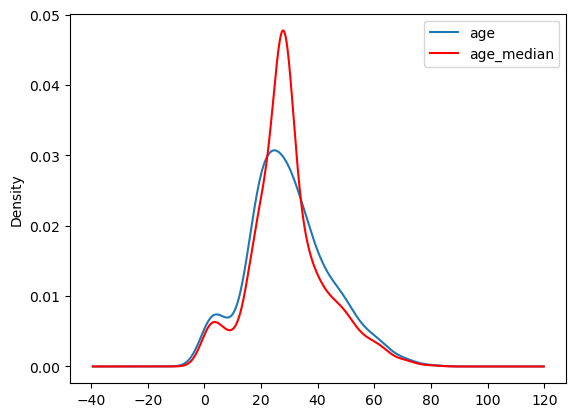

In [69]:
#Lets plot
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

# Advantages And Disadvantages of Mean/Median Imputation
# Advantages

Easy to implement(Robust to outliers)


Faster way to obtain the complete dataset
# Disadvantages


Change or Distortion in the original variance


Impacts Correlation

# Feature Engineering 2.0

#### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [76]:
import pandas as pd
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
df=df[['age','fare','alive']]

In [81]:
#Lets check the top 5 rows with columns
df.head()

,age,fare,alive
0,22.0,7.2500,no
1,38.0,71.2833,yes
2,26.0,7.9250,yes
3,35.0,53.1000,yes
4,35.0,8.0500,no


In [167]:
#Lets check the null values.
df.isnull().sum()

sex            0
class          0
who            0
alone          0
embark_town    2
embarked       2
Third          0
First          0
Second         0
dtype: int64

In [83]:
#Lets check the mean value of isnull
df.isnull().mean()

age      0.198653
fare     0.000000
alive    0.000000
dtype: float64

In [88]:
df['age'].isnull().sum()

177

In [89]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [91]:
df[df['age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [92]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

This code is a function called "impute_nan" that takes three arguments: "df", "variable", and "median". It is used for imputing missing values in a specific column ("variable") of a pandas dataframe ("df").

The function first creates a new column in the dataframe by appending "_median" to the variable name. This new column will contain the median value of the original column. This is done by using the "fillna" method to fill in the missing values with the specified median.

The function also creates another new column in the dataframe by appending "_random" to the variable name. This new column is initially set to be the same as the original column.

Next, the function generates a random sample of non-missing values from the original column ("variable") using the "dropna" and "sample" methods. The number of values in the sample is equal to the number of missing values in the original column.

The function then assigns the randomly generated values to the missing values in the "_random" column. This is done by using the "loc" method to locate the rows where the original column has missing values, and then assigning the corresponding values from the random sample to the "_random" column.

Overall, this function provides two methods for imputing missing values in a pandas dataframe: using the median value, or using random sampling from the non-missing values.

In [96]:
median=df.age.median()
median

28.0

In [98]:
impute_nan(df,"age",median)

In [100]:
df.head()

,age,fare,alive,age_median,age_random
0,22.0,7.2500,no,22.0,22.0
1,38.0,71.2833,yes,38.0,38.0
2,26.0,7.9250,yes,26.0,26.0
3,35.0,53.1000,yes,35.0,35.0
4,35.0,8.0500,no,35.0,35.0


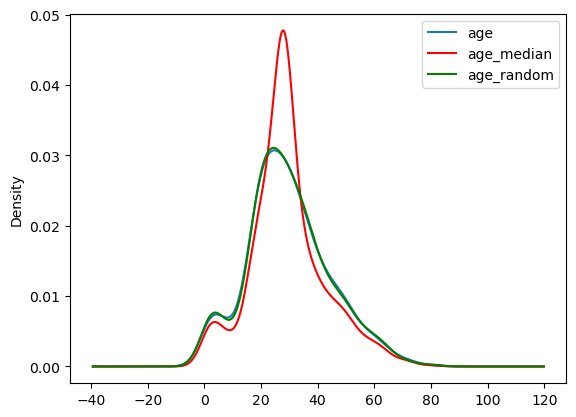

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
df.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

##### Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [108]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cabin_null,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,26.0


In [110]:
import numpy as np
df['Age_NAN']=np.where(df['age'].isnull(),1,0)

In [111]:
df

,age,fare,alive,age_median,age_random,Age_NAN
0,22.0,7.2500,no,22.0,22.0,0
1,38.0,71.2833,yes,38.0,38.0,0
2,26.0,7.9250,yes,26.0,26.0,0
3,35.0,53.1000,yes,35.0,35.0,0
4,35.0,8.0500,no,35.0,35.0,0
...,...,...,...,...,...,...
886,27.0,13.0000,no,27.0,27.0,0
887,19.0,30.0000,yes,19.0,19.0,0
888,NaN,23.4500,no,28.0,15.0,1
889,26.0,30.0000,yes,26.0,26.0,0


In [112]:
df.head()

,age,fare,alive,age_median,age_random,Age_NAN
0,22.0,7.2500,no,22.0,22.0,0
1,38.0,71.2833,yes,38.0,38.0,0
2,26.0,7.9250,yes,26.0,26.0,0
3,35.0,53.1000,yes,35.0,35.0,0
4,35.0,8.0500,no,35.0,35.0,0


In [114]:
df.age.median()

28.0

In [115]:
df['age'].fillna(df.age.median(),inplace=True)

In [116]:
df.head(10)

,age,fare,alive,age_median,age_random,Age_NAN
0,22.0,7.2500,no,22.0,22.0,0
1,38.0,71.2833,yes,38.0,38.0,0
2,26.0,7.9250,yes,26.0,26.0,0
3,35.0,53.1000,yes,35.0,35.0,0
4,35.0,8.0500,no,35.0,35.0,0
5,28.0,8.4583,no,28.0,28.0,1
6,54.0,51.8625,no,54.0,54.0,0
7,2.0,21.0750,no,2.0,2.0,0
8,27.0,11.1333,yes,27.0,27.0,0
9,14.0,30.0708,yes,14.0,14.0,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

#### End of Distribution imputation

In [117]:
df=data[['age','fare','alive']]
df

,age,fare,alive
0,22.0,7.2500,no
1,38.0,71.2833,yes
2,26.0,7.9250,yes
3,35.0,53.1000,yes
4,35.0,8.0500,no
...,...,...,...
886,27.0,13.0000,no
887,19.0,30.0000,yes
888,NaN,23.4500,no
889,26.0,30.0000,yes


<AxesSubplot:>

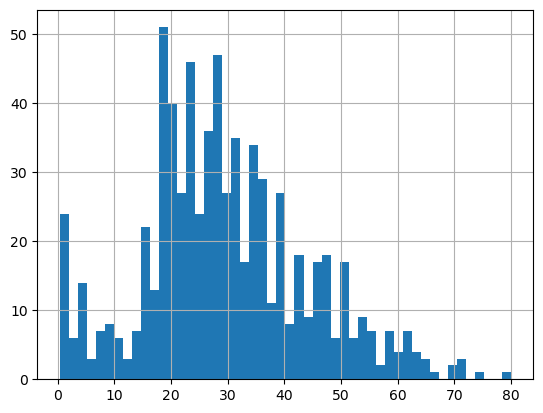

In [118]:
df.age.hist(bins=50)

In [119]:
extreme=df.age.mean()+3*df.age.std()

<AxesSubplot:xlabel='age'>

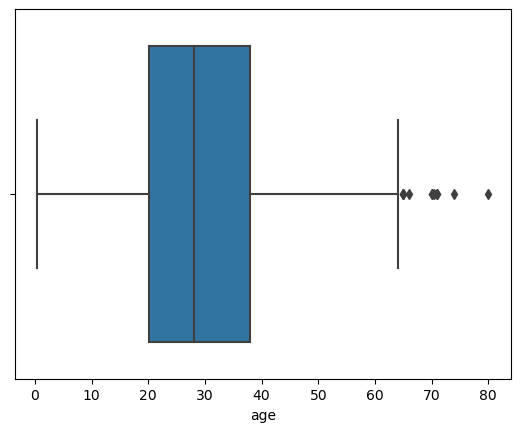

In [121]:
import seaborn as sns
sns.boxplot('age',data=df)

In [122]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [124]:
impute_nan(df,'age',df.age.median(),extreme)

In [125]:
df.head()

,age,fare,alive,age_end_distribution
0,22.0,7.2500,no,22.0
1,38.0,71.2833,yes,38.0
2,26.0,7.9250,yes,26.0
3,35.0,53.1000,yes,35.0
4,35.0,8.0500,no,35.0


<AxesSubplot:>

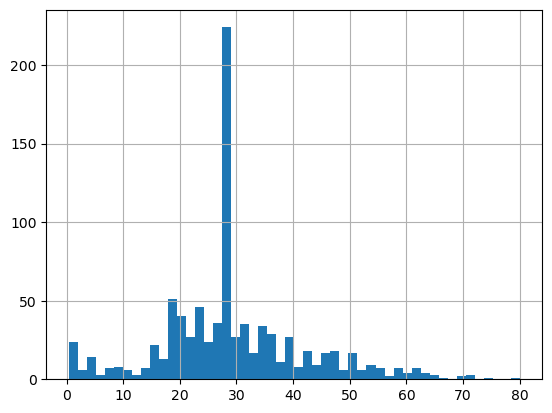

In [126]:
df['age'].hist(bins=50)

<AxesSubplot:>

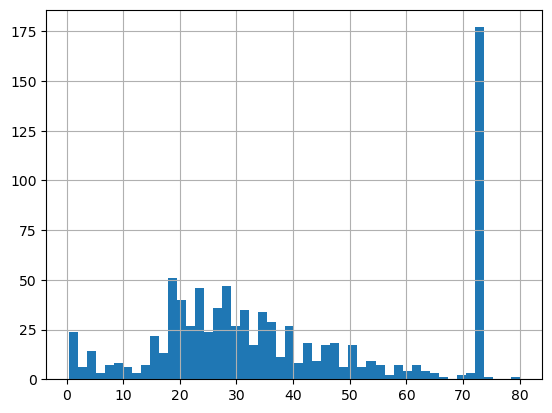

In [128]:
df['age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='age_end_distribution'>

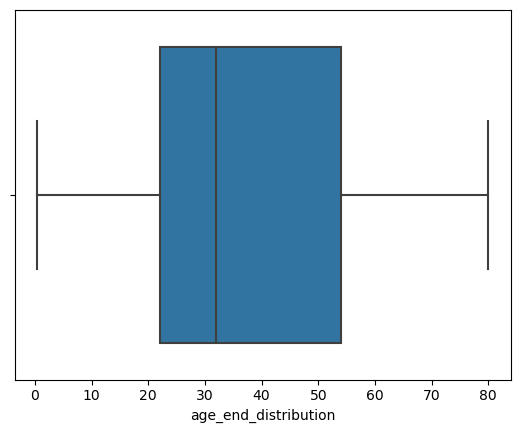

In [129]:
sns.boxplot('age_end_distribution',data=df)

# Feature Engineering 3.0

# Handle Categorical Features
One Hot Encoding

In [130]:
import pandas as pd

In [132]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cabin_null,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,35.0


In [133]:
df=data['sex']

In [136]:
pd.get_dummies(df,drop_first=False).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [138]:
df=data['embarked']

In [142]:
df.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [143]:
df.dropna(inplace=True)

In [145]:
pd.get_dummies(df,drop_first=False).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [146]:
#### Onehotencoding with many categories in a feature

In [152]:
df=data[['sex','class','who','alone','embark_town','embarked',]]

In [153]:
df.head()

,sex,class,who,alone,embark_town,embarked
0,male,Third,man,False,Southampton,S
1,female,First,woman,False,Cherbourg,C
2,female,Third,woman,True,Southampton,S
3,female,First,woman,False,Southampton,S
4,male,Third,man,True,Southampton,S


In [154]:
for i in df.columns:
    print(len(df[i].unique()))

2
3
3
2
4
4


In [157]:
df['class'].value_counts().sort_values(ascending=True).head(10)

Second    184
First     216
Third     491
Name: class, dtype: int64

In [158]:
lst_10=df['class'].value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [160]:
lst_10

['Third', 'First', 'Second']

In [161]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['class']==categories,1,0)

In [162]:
lst_10.append('class')

In [163]:
lst_10

['Third', 'First', 'Second', 'class']

In [164]:
df[lst_10]

,Third,First,Second,class
0,1,0,0,Third
1,0,1,0,First
2,1,0,0,Third
3,0,1,0,First
4,1,0,0,Third
...,...,...,...,...
886,0,0,1,Second
887,0,1,0,First
888,1,0,0,Third
889,0,1,0,First


In [165]:
#Intern of Pranathi
#Student of DataTrained - Saurav
#Date - 29-03-2023
#Time -> 11:00